<a href="https://colab.research.google.com/github/JuanSamuel1/Exchange-Rate-Predictions/blob/main/exchangeratepredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Library

In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

Loading Data

In [ ]:
from google.colab import files
uploaded = files.upload()
data= pd.read_csv(io.BytesIO(uploaded['sg_exchange_rate.csv']),parse_dates=['month'])

Saving sg_exchange_rate.csv to sg_exchange_rate (9).csv


Test Data

In [ ]:
data.head(5)

,currency,exchange_rate,description
month,,,
1988-01-01,US Dollar,2.0253,Singapore Dollar Per US Dollar
1988-02-01,US Dollar,2.0173,Singapore Dollar Per US Dollar
1988-03-01,US Dollar,2.0133,Singapore Dollar Per US Dollar
1988-04-01,US Dollar,2.0037,Singapore Dollar Per US Dollar
1988-05-01,US Dollar,2.0098,Singapore Dollar Per US Dollar


Choosing the US Dollar Currency

In [ ]:
us_data= data.loc[data.currency == 'US Dollar']
us_data['date']= us_data.month.dt.year + (us_data.month.dt.month/12)
us_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month,currency,exchange_rate,description,date
0,1988-01-01,US Dollar,2.0253,Singapore Dollar Per US Dollar,1988.083333
1,1988-02-01,US Dollar,2.0173,Singapore Dollar Per US Dollar,1988.166667
2,1988-03-01,US Dollar,2.0133,Singapore Dollar Per US Dollar,1988.250000
3,1988-04-01,US Dollar,2.0037,Singapore Dollar Per US Dollar,1988.333333
4,1988-05-01,US Dollar,2.0098,Singapore Dollar Per US Dollar,1988.416667
...,...,...,...,...,...
387,2020-04-01,US Dollar,1.4245,Singapore Dollar Per US Dollar,2020.333333
388,2020-05-01,US Dollar,1.418,Singapore Dollar Per US Dollar,2020.416667
389,2020-06-01,US Dollar,1.3941,Singapore Dollar Per US Dollar,2020.500000
390,2020-07-01,US Dollar,1.3883,Singapore Dollar Per US Dollar,2020.583333


In [ ]:
new_us_data = us_data.set_index('month')
new_us_data

,currency,exchange_rate,description,date
month,,,,
1988-01-01,US Dollar,2.0253,Singapore Dollar Per US Dollar,1988.083333
1988-02-01,US Dollar,2.0173,Singapore Dollar Per US Dollar,1988.166667
1988-03-01,US Dollar,2.0133,Singapore Dollar Per US Dollar,1988.250000
1988-04-01,US Dollar,2.0037,Singapore Dollar Per US Dollar,1988.333333
1988-05-01,US Dollar,2.0098,Singapore Dollar Per US Dollar,1988.416667
...,...,...,...,...
2020-04-01,US Dollar,1.4245,Singapore Dollar Per US Dollar,2020.333333
2020-05-01,US Dollar,1.418,Singapore Dollar Per US Dollar,2020.416667
2020-06-01,US Dollar,1.3941,Singapore Dollar Per US Dollar,2020.500000


Changing data types

In [ ]:
new_us_data.dtypes

currency          object
exchange_rate     object
description       object
date             float64
dtype: object

In [ ]:
new_us_data['exchange_rate']= new_us_data.exchange_rate.astype(float)

Plotting

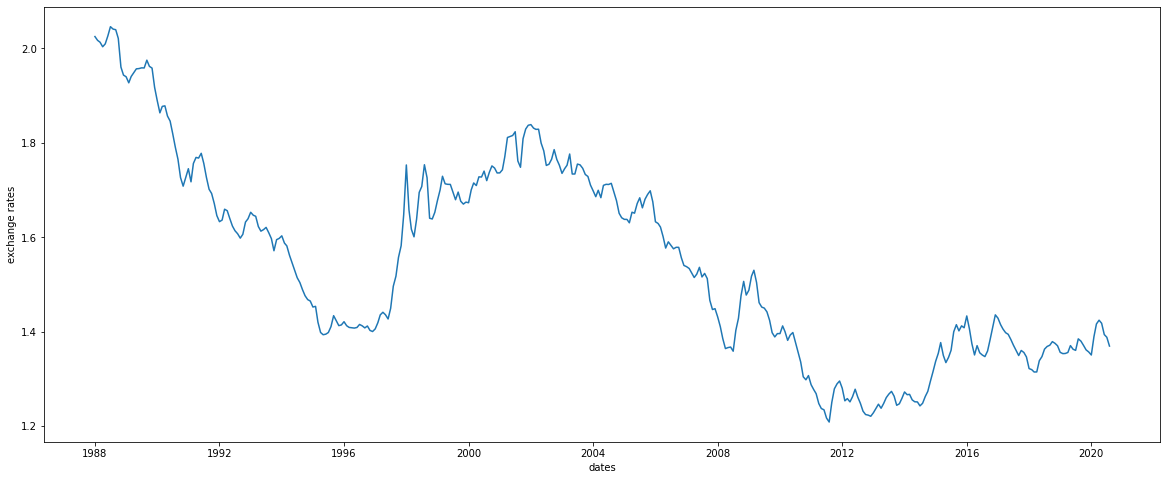

In [ ]:
plt.figure(figsize=(20,8))
plt.xlabel('dates')
plt.ylabel('exchange rates')
sns.lineplot(data= new_us_data['exchange_rate'])

In [ ]:
us_data_drop = new_us_data.drop(columns= ['currency','description'])
us_data_drop.head()

,exchange_rate,date
month,,
1988-01-01,2.0253,1988.083333
1988-02-01,2.0173,1988.166667
1988-03-01,2.0133,1988.250000
1988-04-01,2.0037,1988.333333
1988-05-01,2.0098,1988.416667


In [ ]:
yy = us_data_drop.values[:,0]
XX = us_data_drop.values[:,1]
m = len(y)

In [ ]:
XX_train, XX_test, yy_train, y_test = train_test_split( XX, yy, test_size=0.33, random_state=42)
print(XX_train.shape)
print(X_test.shape)
print(yy_train.shape)
print(y_test.shape)

(262,)
(130,)
(262,)
(130,)


In [ ]:
X_train = []
for i in range(len(XX_train)): 
  X_train.append([XX_train[i]])

X_test = []
for i in range(len(XX_test)): 
  X_test.append([XX_test[i]])

y_train = []
for i in range(len(yy_train)):
  y_train.append([yy_train[i]])



In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_predicted = pol_reg.predict(X_train_poly)
y_test_predict = pol_reg.predict(poly_reg.fit_transform(X_test)) 

rmse_train = np.sqrt(mean_squared_error(y_train , y_train_predicted))
r2_train = r2_score(y_train , y_train_predicted) 

rmse_test = np.sqrt(mean_squared_error(y_test , y_test_predict))
r2_test = r2_score(y_test , y_test_predict) 

print(rmse_train)
print(r2_train)

print(rmse_test)
print(r2_test)


0.13848517649132838
0.5399093527443914
0.1430130020274966
0.5465559505531034


In [ ]:
test = [[2021.1]]
pol_reg.predict(poly_reg.fit_transform(test))

array([[1.27064173]])

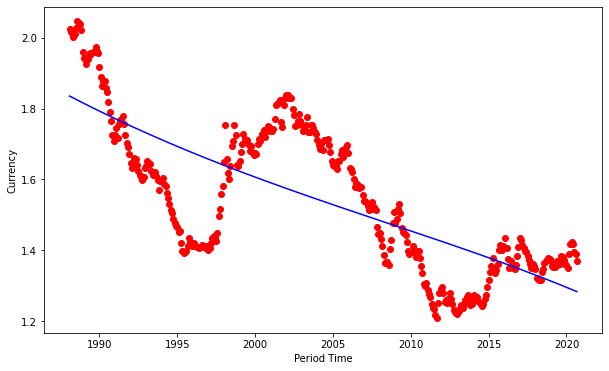

In [ ]:
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.xlabel('Period Time')
    plt.ylabel('Currency')
    plt.show()

In [ ]:
map_x = []
test=[]
for i in range(1,13):
  test.append([2021+i/12])
map_x=pol_reg.predict(poly_reg.fit_transform(test))
flat_x= map_x.flatten()
dict_x={'exchange rate 2021':flat_x}
index_column=['January','February','March','April','May','June','July','August','September','October','November','Desember']
predict_data= pd.DataFrame(dict_x,index=index_column)
predict_data

,exchange rate 2021
January,1.270911
February,1.269563
March,1.268216
April,1.266869
May,1.265523
June,1.264178
July,1.262833
August,1.261489
September,1.260146
October,1.258803
